In [1]:
# Membuka file
import pandas as pd
# Import data
pos = pd.read_excel('D:/VALIDASI/LDA/pos_belviu.xlsx')
neg = pd.read_excel('D:/VALIDASI/LDA/neg_belviu.xlsx')
neg.head()

,Review
0,inap malam bandara interior kolam renang air ...
1,front_office pria tolong tingkat ramah ketemu ...
2,pesan tipe superior interior staf ramah sarap...
3,predikat ekspektasi checkin suruh deposit pesa...
4,maaf timbang sarap biasa jatah dewasa batas um...


In [2]:
a = pos['Review'].to_list()
b = neg['Review'].to_list()

In [3]:
pos_tokens = [[text for text in a.split()] for a in a]
neg_tokens = [[text for text in b.split()] for b in b]

In [4]:
pos_token = []
for sublist in pos_tokens:
    for item in sublist:
        pos_token.append(item)

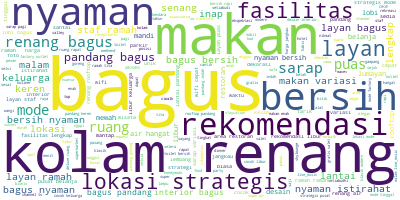

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(pos['Review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [6]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(pos_tokens, min_count=10)
trigram = Phrases(bigram[pos_tokens])
for idx in range(len(pos_tokens)):
    for token in bigram[pos_tokens[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            pos_tokens[idx].append(token)
    for token in trigram[pos_tokens[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            pos_tokens[idx].append(token)

C:\Users\Sesditjen PHIJSK\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(pos_tokens)
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [8]:
print(dictionary)

Dictionary(197 unique tokens: ['goreng', 'libur', 'wisata', 'cepat', 'cepat_tanggap']...)


In [9]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in pos_tokens]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

687
[(3, 1), (10, 1), (11, 3), (12, 1), (66, 1), (70, 3), (83, 1), (93, 1), (141, 1)]


In [10]:
id_words = [[(dictionary[id], count) for id, count in line] for line in doc_term_matrix]
print(id_words[100])

[('cepat', 1), ('staf', 1), ('staf_ramah', 3), ('tanggap', 1), ('istirahat', 1), ('nyaman_istirahat', 3), ('variasi', 1), ('resepsionis', 1), ('sejuk', 1)]


In [11]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.7519833907619875), (1, 0.32787359125279925), (2, 0.5718565276160588)]


In [12]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10, alpha ='auto', eta='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

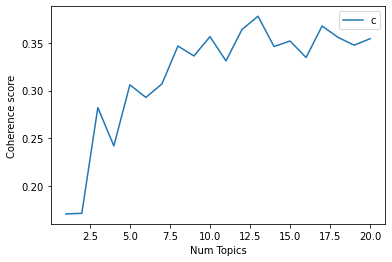

In [13]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=pos_tokens, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.170903
Num Topics = 2  has Coherence Value of 0.171504
Num Topics = 3  has Coherence Value of 0.282201
Num Topics = 4  has Coherence Value of 0.242082
Num Topics = 5  has Coherence Value of 0.30603
Num Topics = 6  has Coherence Value of 0.292841
Num Topics = 7  has Coherence Value of 0.306915
Num Topics = 8  has Coherence Value of 0.346618
Num Topics = 9  has Coherence Value of 0.336234
Num Topics = 10  has Coherence Value of 0.356487
Num Topics = 11  has Coherence Value of 0.331072
Num Topics = 12  has Coherence Value of 0.364001
Num Topics = 13  has Coherence Value of 0.377811
Num Topics = 14  has Coherence Value of 0.346098
Num Topics = 15  has Coherence Value of 0.35188
Num Topics = 16  has Coherence Value of 0.33462
Num Topics = 17  has Coherence Value of 0.3676
Num Topics = 18  has Coherence Value of 0.355659
Num Topics = 19  has Coherence Value of 0.347535
Num Topics = 20  has Coherence Value of 0.354306


In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=13, random_state=100, passes=10, alpha ='auto', eta='auto') #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.132*"pusat_belanja" + 0.055*"pusat" + 0.053*"lokasi_strategis" + 0.051*"belanja" + 0.050*"parkir" + 0.036*"gratis" + 0.033*"valet" + 0.025*"nyaman_istirahat" + 0.025*"gratis_valet" + 0.024*"ngopi"
Topic: 1 Word: 0.069*"keluarga" + 0.067*"libur" + 0.051*"cocok" + 0.050*"libur_keluarga" + 0.049*"factory_outlet" + 0.046*"mantap" + 0.039*"tinggal" + 0.038*"senang" + 0.033*"outlet" + 0.032*"cocok_keluarga"
Topic: 2 Word: 0.203*"air_hangat" + 0.074*"air" + 0.071*"hangat" + 0.038*"puas" + 0.029*"bilik" + 0.027*"keren" + 0.026*"desain" + 0.025*"setiabudi" + 0.024*"weekend" + 0.019*"menit"
Topic: 3 Word: 0.135*"fasilitas_lengkap" + 0.090*"lokasi_strategis" + 0.066*"lengkap" + 0.043*"nyaman_istirahat" + 0.042*"variasi" + 0.034*"sarap_variasi" + 0.026*"desain" + 0.026*"desain_interior" + 0.024*"interior" + 0.022*"mandi"
Topic: 4 Word: 0.041*"bantal" + 0.039*"channel" + 0.039*"channel_tv" + 0.038*"sukses" + 0.036*"lokasi_strategis" + 0.035*"tv" + 0.032*"inap" + 0.032*"selera" + 0.

In [14]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("D:/VALIDASI/LDA/Hasil/Belviu Pos_New.csv")
print(df)

None


In [15]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.save_html(data, 'D:/VALIDASI/LDA/Hasil/visualisasi-belviu-pos-lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.015299 -0.059913       1        1  11.133833
3     -0.119701 -0.054405       2        1   9.864075
12    -0.047738 -0.072079       3        1   9.852586
1      0.100389  0.048163       4        1   8.969682
5     -0.001563 -0.228332       5        1   8.181649
8     -0.171710  0.026529       6        1   7.979038
0     -0.150806  0.103708       7        1   7.804941
2      0.073828 -0.027682       8        1   7.578715
11     0.151444 -0.034397       9        1   6.862629
7      0.050471  0.070320      10        1   6.703870
6      0.091441  0.095303      11        1   5.630480
9     -0.031234  0.061023      12        1   5.547468
4      0.039880  0.071763      13        1   3.891034, topic_info=                  Term       Freq      Total Category  logprob  loglift
11          staf_ramah  43.000000  43.000000  Default  30.0000  30.0000
131

In [16]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.015299 -0.059913       1        1  11.133833
3     -0.119701 -0.054405       2        1   9.864075
12    -0.047738 -0.072079       3        1   9.852586
1      0.100389  0.048163       4        1   8.969682
5     -0.001563 -0.228332       5        1   8.181649
8     -0.171710  0.026529       6        1   7.979038
0     -0.150806  0.103708       7        1   7.804941
2      0.073828 -0.027682       8        1   7.578715
11     0.151444 -0.034397       9        1   6.862629
7      0.050471  0.070320      10        1   6.703870
6      0.091441  0.095303      11        1   5.630480
9     -0.031234  0.061023      12        1   5.547468
4      0.039880  0.071763      13        1   3.891034, topic_info=                  Term       Freq      Total Category  logprob  loglift
11          staf_ramah  43.000000  43.000000  Default  30.0000  30.0000
131         air_hangat  24.000000  24.000000  Default  29.0000  29.0000
45   fasilitas_lengkap  21.000000  21.000000  Default  28.0000  28.0000
105         live_music  15.000000  15.000000  Default  27.0000  27.0000
70    nyaman_istirahat  42.000000  42.000000  Default  26.0000  26.0000
..                 ...        ...        ...      ...      ...      ...
42            restoran   0.857860  15.568922  Topic13  -4.2448   0.3479
17               ruang   0.918125  22.135561  Topic13  -4.1769   0.0639
8                 puas   1.019428  28.888872  Topic13  -4.0723  -0.0977
28             rooftop   0.819441  17.784263  Topic13  -4.2906   0.1690
65                 air   0.640251  13.524895  Topic13  -4.5374   0.1961

[536 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
65        1  0.073938          air
65        8  0.665440          air
65        9  0.073938          air
65       13  0.073938          air
131       8  0.966889   air_hangat
...     ...       ...          ...
62        9  0.885396   wifi_cepat
192      10  0.616541  wifi_lancar
2         3  0.130711       wisata
2         6  0.392133       wisata
2         7  0.130711       wisata

[620 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 4, 13, 2, 6, 9, 1, 3, 12, 8, 7, 10, 5])

In [17]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=8, random_state=100, passes=10, alpha ='auto', eta='auto') #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.101*"pusat_belanja" + 0.072*"lokasi_strategis" + 0.044*"pusat" + 0.044*"belanja" + 0.034*"parkir" + 0.025*"gratis" + 0.022*"wisata" + 0.021*"nyaman_istirahat" + 0.020*"valet" + 0.019*"menit"
Topic: 1 Word: 0.061*"keluarga" + 0.055*"libur" + 0.039*"senang" + 0.036*"libur_keluarga" + 0.033*"lokasi_strategis" + 0.033*"cocok" + 0.032*"mantap" + 0.029*"puas" + 0.029*"waktu" + 0.024*"factory_outlet"
Topic: 2 Word: 0.109*"air_hangat" + 0.047*"puas" + 0.037*"air" + 0.036*"hangat" + 0.027*"foto" + 0.027*"inap" + 0.024*"keren" + 0.021*"lobi" + 0.020*"rooftop" + 0.017*"dapat"
Topic: 3 Word: 0.101*"nyaman_istirahat" + 0.087*"lokasi_strategis" + 0.060*"fasilitas_lengkap" + 0.039*"wifi_cepat" + 0.032*"variasi" + 0.032*"istirahat" + 0.030*"lengkap" + 0.025*"tinggal" + 0.023*"wifi" + 0.016*"desain"
Topic: 4 Word: 0.037*"interior" + 0.037*"tv" + 0.033*"betah" + 0.032*"tidur" + 0.031*"ruang" + 0.028*"lokasi_strategis" + 0.028*"malam" + 0.024*"sukses" + 0.023*"unik" + 0.023*"alat"
Topic:

In [18]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("D:/VALIDASI/LDA/Hasil/Belviu Pos New.csv")

None


In [19]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'D:/VALIDASI/LDA/Hasil/visualisasi-belviu-pos-lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.100159  0.103998       1        1  22.934473
5      0.074433  0.155506       2        1  19.569314
2      0.080259  0.000699       3        1  14.386928
1      0.065666 -0.066900       4        1  10.575769
0     -0.194238 -0.038195       5        1  10.214980
4      0.044310 -0.052979       6        1   8.058211
7      0.005427 -0.031206       7        1   7.710421
6      0.024303 -0.070922       8        1   6.549905, topic_info=                 Term       Freq      Total Category  logprob  loglift
11         staf_ramah  41.000000  41.000000  Default  30.0000  30.0000
131        air_hangat  25.000000  25.000000  Default  29.0000  29.0000
105        live_music  15.000000  15.000000  Default  28.0000  28.0000
125     pusat_belanja  16.000000  16.000000  Default  27.0000  27.0000
70   nyaman_istirahat  42.000000  42.000000  Default  26.0000 

In [20]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.100159  0.103998       1        1  22.934473
5      0.074433  0.155506       2        1  19.569314
2      0.080259  0.000699       3        1  14.386928
1      0.065666 -0.066900       4        1  10.575769
0     -0.194238 -0.038195       5        1  10.214980
4      0.044310 -0.052979       6        1   8.058211
7      0.005427 -0.031206       7        1   7.710421
6      0.024303 -0.070922       8        1   6.549905, topic_info=                 Term       Freq      Total Category  logprob  loglift
11         staf_ramah  41.000000  41.000000  Default  30.0000  30.0000
131        air_hangat  25.000000  25.000000  Default  29.0000  29.0000
105        live_music  15.000000  15.000000  Default  28.0000  28.0000
125     pusat_belanja  16.000000  16.000000  Default  27.0000  27.0000
70   nyaman_istirahat  42.000000  42.000000  Default  26.0000  26.0000
..                ...        ...        ...      ...      ...      ...
17              ruang   1.993569  21.900414   Topic8  -3.9224   0.3291
67              keren   1.425922  17.794123   Topic8  -4.2575   0.2017
13              cocok   1.088368  13.562295   Topic8  -4.5276   0.2031
41           keluarga   1.192441  23.275387   Topic8  -4.4363  -0.2457
30   lokasi_strategis   1.193080  57.733856   Topic8  -4.4357  -1.1536

[365 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
65        1  0.072571          air
65        2  0.072571          air
65        3  0.580572          air
65        5  0.072571          air
65        6  0.145143          air
...     ...       ...          ...
192       5  0.628996  wifi_lancar
2         2  0.132436       wisata
2         3  0.132436       wisata
2         5  0.397309       wisata
2         6  0.264872       wisata

[593 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 3, 2, 1, 5, 8, 7])

In [21]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4, random_state=100, passes=10, alpha ='auto', eta='auto') #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.049*"pusat_belanja" + 0.030*"ruang" + 0.025*"rapat" + 0.025*"belanja" + 0.024*"interior" + 0.022*"cantik" + 0.021*"pusat" + 0.020*"puas" + 0.020*"cocok" + 0.020*"jangkau"
Topic: 1 Word: 0.065*"staf_ramah" + 0.043*"area_restoran" + 0.032*"puas" + 0.029*"keluarga" + 0.027*"inap" + 0.027*"libur" + 0.027*"staf" + 0.024*"senang" + 0.018*"area" + 0.018*"restoran"
Topic: 2 Word: 0.104*"air_hangat" + 0.065*"live_music" + 0.042*"air" + 0.035*"hangat" + 0.023*"malam" + 0.023*"lokasi_strategis" + 0.023*"staf_ramah" + 0.021*"rooftop" + 0.017*"dapat" + 0.015*"keren"
Topic: 3 Word: 0.083*"lokasi_strategis" + 0.079*"nyaman_istirahat" + 0.041*"fasilitas_lengkap" + 0.030*"istirahat" + 0.028*"variasi" + 0.027*"wifi_cepat" + 0.026*"lengkap" + 0.019*"wifi" + 0.017*"cepat" + 0.015*"rooftop"


In [22]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("D:/VALIDASI/LDA/Hasil/Belviu Pos New.csv")

None


In [23]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.save_html(data, 'D:/VALIDASI/LDA/Hasil/visualisasi-belviu-pos-lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.041579  0.154787       1        1  36.123953
1     -0.026962 -0.066554       2        1  29.633821
0      0.129716 -0.076502       3        1  20.111790
2     -0.144333 -0.011731       4        1  14.130437, topic_info=                 Term       Freq      Total Category  logprob  loglift
131        air_hangat  23.000000  23.000000  Default  30.0000  30.0000
70   nyaman_istirahat  44.000000  44.000000  Default  29.0000  29.0000
105        live_music  14.000000  14.000000  Default  28.0000  28.0000
125     pusat_belanja  15.000000  15.000000  Default  27.0000  27.0000
187     area_restoran  20.000000  20.000000  Default  26.0000  26.0000
..                ...        ...        ...      ...      ...      ...
30   lokasi_strategis   5.035094  59.003899   Topic4  -3.7647  -0.5043
10               staf   2.909855  19.172776   Topic4  -4.3131   0

In [24]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.041579  0.154787       1        1  36.123953
1     -0.026962 -0.066554       2        1  29.633821
0      0.129716 -0.076502       3        1  20.111790
2     -0.144333 -0.011731       4        1  14.130437, topic_info=                 Term       Freq      Total Category  logprob  loglift
131        air_hangat  23.000000  23.000000  Default  30.0000  30.0000
70   nyaman_istirahat  44.000000  44.000000  Default  29.0000  29.0000
105        live_music  14.000000  14.000000  Default  28.0000  28.0000
125     pusat_belanja  15.000000  15.000000  Default  27.0000  27.0000
187     area_restoran  20.000000  20.000000  Default  26.0000  26.0000
..                ...        ...        ...      ...      ...      ...
30   lokasi_strategis   5.035094  59.003899   Topic4  -3.7647  -0.5043
10               staf   2.909855  19.172776   Topic4  -4.3131   0.0715
29             senang   2.858676  19.633792   Topic4  -4.3308   0.0299
8                puas   2.820186  28.882244   Topic4  -4.3444  -0.3696
1               libur   2.162545  21.451167   Topic4  -4.6099  -0.3377

[216 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
65        1  0.077462          air
65        2  0.077462          air
65        3  0.154923          air
65        4  0.697154          air
131       4  0.983476   air_hangat
...     ...       ...          ...
62        1  0.952965   wifi_cepat
192       3  0.655291  wifi_lancar
2         1  0.270198       wisata
2         2  0.135099       wisata
2         3  0.540396       wisata

[337 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [63]:
# get value for each word
list_top = model.get_topics()

In [64]:
len(list_top)

4

In [65]:
# convert list shape
temp_list = []
temp_lab = []

for i in range (0, len(list_top)):
    temp_list.extend(list_top[i])
    t = [i] * len(list_top[i])
    temp_lab.extend(t)

In [66]:
# change list of data into df
# add dummy column to fulfill metrics condition (2D data input needed)

df_c = pd.DataFrame(temp_list)
dummy_li = [1] * len(temp_list)
df_c['bias'] = dummy_li

In [67]:
# calculate dispersion ratio
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

arr_data = np.array(temp_list)
arr_lab = np.array(temp_lab)

db = davies_bouldin_score(df_c, arr_lab)
print('davies bouldin index : {}'.format(db))

ch = calinski_harabasz_score(df_c, arr_lab)
print('calinski harabasz index : {}'.format(ch))

davies bouldin index : 487379.2431559871
calinski harabasz index : 1.9182141655945688e-13


## Tambahan Indeks Calinski Harabasz
4 topik memiliki nilai Indeks Calinski Harabasz yang paling tinggi, sehingga jumlah topik optimal adalah 4 topik.

In [13]:
model2 = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=2, random_state=100, passes=10, alpha ='auto', eta='auto')
model3 = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=3, random_state=100, passes=10, alpha ='auto', eta='auto')
model4 = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4, random_state=100, passes=10, alpha ='auto', eta='auto')
model5 = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5, random_state=100, passes=10, alpha ='auto', eta='auto')
model6 = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=6, random_state=100, passes=10, alpha ='auto', eta='auto')

In [14]:
# get value for each word
list_top = model2.get_topics()
# convert list shape
temp_list = []
temp_lab = []

for i in range (0, len(list_top)):
    temp_list.extend(list_top[i])
    t = [i] * len(list_top[i])
    temp_lab.extend(t)
# change list of data into df
# add dummy column to fulfill metrics condition (2D data input needed)

df_c = pd.DataFrame(temp_list)
dummy_li = [1] * len(temp_list)
df_c['bias'] = dummy_li

# calculate dispersion ratio
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

arr_data = np.array(temp_list)
arr_lab = np.array(temp_lab)

db = davies_bouldin_score(df_c, arr_lab)
print('davies bouldin index : {}'.format(db))

ch = calinski_harabasz_score(df_c, arr_lab)
print('calinski harabasz index : {}'.format(ch))

davies bouldin index : 0.0
calinski harabasz index : 6.984395079614918e-14


In [15]:
# get value for each word
list_top = model3.get_topics()
# convert list shape
temp_list = []
temp_lab = []

for i in range (0, len(list_top)):
    temp_list.extend(list_top[i])
    t = [i] * len(list_top[i])
    temp_lab.extend(t)
# change list of data into df
# add dummy column to fulfill metrics condition (2D data input needed)

df_c = pd.DataFrame(temp_list)
dummy_li = [1] * len(temp_list)
df_c['bias'] = dummy_li

# calculate dispersion ratio
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

arr_data = np.array(temp_list)
arr_lab = np.array(temp_lab)

db = davies_bouldin_score(df_c, arr_lab)
print('davies bouldin index : {}'.format(db))

ch = calinski_harabasz_score(df_c, arr_lab)
print('calinski harabasz index : {}'.format(ch))

davies bouldin index : 424386.4863979248
calinski harabasz index : 5.936564410045576e-15


In [16]:
# get value for each word
list_top = model4.get_topics()
# convert list shape
temp_list = []
temp_lab = []

for i in range (0, len(list_top)):
    temp_list.extend(list_top[i])
    t = [i] * len(list_top[i])
    temp_lab.extend(t)
# change list of data into df
# add dummy column to fulfill metrics condition (2D data input needed)

df_c = pd.DataFrame(temp_list)
dummy_li = [1] * len(temp_list)
df_c['bias'] = dummy_li

# calculate dispersion ratio
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

arr_data = np.array(temp_list)
arr_lab = np.array(temp_lab)

db = davies_bouldin_score(df_c, arr_lab)
print('davies bouldin index : {}'.format(db))

ch = calinski_harabasz_score(df_c, arr_lab)
print('calinski harabasz index : {}'.format(ch))

davies bouldin index : 487379.2431559871
calinski harabasz index : 1.9182141655945688e-13


In [17]:
# get value for each word
list_top = model5.get_topics()
# convert list shape
temp_list = []
temp_lab = []

for i in range (0, len(list_top)):
    temp_list.extend(list_top[i])
    t = [i] * len(list_top[i])
    temp_lab.extend(t)
# change list of data into df
# add dummy column to fulfill metrics condition (2D data input needed)

df_c = pd.DataFrame(temp_list)
dummy_li = [1] * len(temp_list)
df_c['bias'] = dummy_li

# calculate dispersion ratio
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

arr_data = np.array(temp_list)
arr_lab = np.array(temp_lab)

db = davies_bouldin_score(df_c, arr_lab)
print('davies bouldin index : {}'.format(db))

ch = calinski_harabasz_score(df_c, arr_lab)
print('calinski harabasz index : {}'.format(ch))

davies bouldin index : 539360.6328809669
calinski harabasz index : 1.4980438055534765e-13


In [18]:
# get value for each word
list_top = model6.get_topics()
# convert list shape
temp_list = []
temp_lab = []

for i in range (0, len(list_top)):
    temp_list.extend(list_top[i])
    t = [i] * len(list_top[i])
    temp_lab.extend(t)
# change list of data into df
# add dummy column to fulfill metrics condition (2D data input needed)

df_c = pd.DataFrame(temp_list)
dummy_li = [1] * len(temp_list)
df_c['bias'] = dummy_li

# calculate dispersion ratio
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

arr_data = np.array(temp_list)
arr_lab = np.array(temp_lab)

db = davies_bouldin_score(df_c, arr_lab)
print('davies bouldin index : {}'.format(db))

ch = calinski_harabasz_score(df_c, arr_lab)
print('calinski harabasz index : {}'.format(ch))

davies bouldin index : 0.0
calinski harabasz index : 1.358221999943282e-13
